In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Data

In [3]:
yelp_train = pd.read_csv("yelp242_train.csv")
yelp_train.info()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       6272 non-null   float64
 1   review_count                6272 non-null   int64  
 2   GoodForKids                 6272 non-null   object 
 3   Alcohol                     6272 non-null   object 
 4   BusinessAcceptsCreditCards  6272 non-null   object 
 5   WiFi                        6272 non-null   object 
 6   BikeParking                 6272 non-null   object 
 7   ByAppointmentOnly           6272 non-null   object 
 8   WheelechairAccessible       6272 non-null   object 
 9   OutdoorSeating              6272 non-null   object 
 10  RestaurantsReservations     6272 non-null   object 
 11  DogsAllowed                 6272 non-null   object 
 12  Caters                      6272 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


In [4]:
yelp_test = pd.read_csv("yelp242_test.csv")
yelp_test.info()
yelp_test.head()
yelp_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stars                       2688 non-null   float64
 1   review_count                2688 non-null   int64  
 2   GoodForKids                 2688 non-null   object 
 3   Alcohol                     2688 non-null   object 
 4   BusinessAcceptsCreditCards  2688 non-null   object 
 5   WiFi                        2688 non-null   object 
 6   BikeParking                 2688 non-null   object 
 7   ByAppointmentOnly           2688 non-null   object 
 8   WheelechairAccessible       2688 non-null   object 
 9   OutdoorSeating              2688 non-null   object 
 10  RestaurantsReservations     2688 non-null   object 
 11  DogsAllowed                 2688 non-null   object 
 12  Caters                      2688 non-null   object 
dtypes: float64(1), int64(1), object(1

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


# Linear Regression

In [5]:
import statsmodels.formula.api as smf
model_new = smf.ols(formula='stars ~ review_count + C(GoodForKids,Treatment(reference = "(Missing)")) + C(Alcohol,Treatment(reference = "(Missing)")) + C(BusinessAcceptsCreditCards,Treatment(reference = "(Missing)")) + C(WiFi,Treatment(reference = "(Missing)")) + C(BikeParking,Treatment(reference = "(Missing)")) +C(ByAppointmentOnly,Treatment(reference = "(Missing)")) + C(WheelechairAccessible,Treatment(reference = "(Missing)")) + C(OutdoorSeating,Treatment(reference = "(Missing)")) + C(RestaurantsReservations,Treatment(reference = "(Missing)")) +C(DogsAllowed,Treatment(reference = "(Missing)")) +C(Caters,Treatment(reference = "(Missing)"))',
                 data=yelp_train).fit()

print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.33
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          2.45e-235
Time:                        00:45:49   Log-Likelihood:                -7220.7
No. Observations:                6272   AIC:                         1.449e+04
Df Residuals:                    6246   BIC:                         1.467e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

## Model Evaluation

In [6]:
import statsmodels.api as sm

def OSR2_1(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    col = ['review_count','GoodForKids','Alcohol','BusinessAcceptsCreditCards','WiFi','BikeParking','ByAppointmentOnly','WheelechairAccessible','OutdoorSeating','RestaurantsReservations','DogsAllowed','Caters']
    df_test_ind = df_test[col]
    df_test_ind = sm.add_constant(df_test_ind)
    y_pred = model.predict(df_test_ind)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST

In [7]:
OSR2_1(model_new, yelp_train, yelp_test, 'stars')

0.1526855652634136

In [8]:
from sklearn.metrics import mean_absolute_error
y_linear_test = yelp_test['stars']
X_linear_test = yelp_test.drop(['stars'], axis=1)

y_linear_pred = model_new.predict(X_linear_test)
print(mean_absolute_error(y_linear_test, y_linear_pred))

0.639768163472888


# Regression Tree

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

y_train = yelp_train['stars']
X_train = pd.get_dummies(yelp_train.drop(['stars'], axis=1))

y_test = yelp_test['stars']
X_test = pd.get_dummies(yelp_test.drop(['stars'], axis=1))

grid_values = {'ccp_alpha': np.linspace(0, 0.02, 50)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_mod = dtr_cv.fit(X_train, y_train)
dtr_mod.predict(X_train)

array([3.53862213, 2.85329341, 3.1352657 , ..., 3.38785047, 3.00684932,
       3.80630631])

## Model Evaluation 

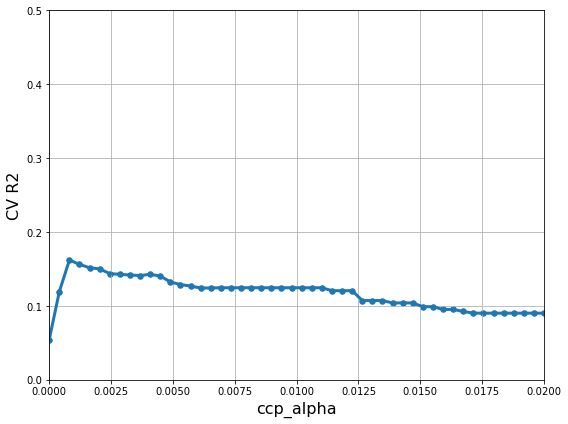

In [10]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.02])
plt.ylim([0, 0.5])

plt.tight_layout()
plt.show()

In [11]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0008163265306122449}


In [12]:
from sklearn.metrics import r2_score

print('CV R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, dtr_cv.predict(X_test)), 5))

CV R2: 0.16189
OSR2: 0.1763


In [13]:
from sklearn.metrics import mean_absolute_error

y_treer_pred = dtr_mod.predict(X_test)
print(mean_absolute_error(y_test, y_treer_pred))

0.6212622572119648


# Add Fourorabove

In [14]:
yelp_train_class = pd.read_csv("yelp242_train.csv")
yelp_train_class["stars"].replace({5: "fourorabove", 4: "fourorabove",4.5: "fourorabove" ,3.5: "below4",3: "below4",2.5: "below4",2: "below4",1.5: "below4",1: "below4"}, inplace=True)
yelp_train_class

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,fourorabove,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,below4,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,fourorabove,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,fourorabove,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,below4,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,below4,15,TRUE,'none',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),FALSE
6268,fourorabove,106,TRUE,(Missing),TRUE,'free',TRUE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE
6269,fourorabove,60,TRUE,'none',TRUE,'no',(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),TRUE
6270,below4,32,TRUE,'none',TRUE,'no',FALSE,(Missing),(Missing),FALSE,FALSE,(Missing),(Missing)


In [15]:
yelp_test_class = pd.read_csv("yelp242_test.csv")
yelp_test_class["stars"].replace({5: "fourorabove", 4: "fourorabove",4.5: "fourorabove" ,3.5: "below4",3: "below4",2.5: "below4",2: "below4",1.5: "below4",1: "below4"}, inplace=True)
yelp_test_class

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,fourorabove,34,(Missing),'full_bar',TRUE,'free',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE
1,fourorabove,802,TRUE,(Missing),TRUE,'free',FALSE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE
2,fourorabove,231,TRUE,'full_bar',TRUE,'free',FALSE,FALSE,(Missing),FALSE,TRUE,FALSE,TRUE
3,below4,27,TRUE,'none',TRUE,'free',TRUE,(Missing),TRUE,FALSE,FALSE,FALSE,TRUE
4,below4,6,(Missing),'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,below4,3,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
2684,below4,8,(Missing),(Missing),TRUE,'no',TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
2685,fourorabove,58,TRUE,'beer_and_wine',TRUE,'no',FALSE,(Missing),(Missing),FALSE,FALSE,(Missing),TRUE
2686,below4,6,(Missing),(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)


In [16]:
yelp_train_new= pd.get_dummies(yelp_train_class, columns = ['stars'],drop_first = True)
yelp_train_new

,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,stars_fourorabove
0,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE,1
1,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),0
2,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),1
3,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE,1
4,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6267,15,TRUE,'none',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),FALSE,0
6268,106,TRUE,(Missing),TRUE,'free',TRUE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE,1
6269,60,TRUE,'none',TRUE,'no',(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),TRUE,1
6270,32,TRUE,'none',TRUE,'no',FALSE,(Missing),(Missing),FALSE,FALSE,(Missing),(Missing),0


In [17]:
yelp_test_new= pd.get_dummies(yelp_test_class, columns = ['stars'],drop_first = True)
yelp_test_new

,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,stars_fourorabove
0,34,(Missing),'full_bar',TRUE,'free',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE,1
1,802,TRUE,(Missing),TRUE,'free',FALSE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE,1
2,231,TRUE,'full_bar',TRUE,'free',FALSE,FALSE,(Missing),FALSE,TRUE,FALSE,TRUE,1
3,27,TRUE,'none',TRUE,'free',TRUE,(Missing),TRUE,FALSE,FALSE,FALSE,TRUE,0
4,6,(Missing),'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,3,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),0
2684,8,(Missing),(Missing),TRUE,'no',TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),0
2685,58,TRUE,'beer_and_wine',TRUE,'no',FALSE,(Missing),(Missing),FALSE,FALSE,(Missing),TRUE,1
2686,6,(Missing),(Missing),TRUE,(Missing),FALSE,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),0


In [18]:
from sklearn.model_selection import train_test_split

y_train_new = yelp_train_new['stars_fourorabove']
X_train_new = pd.get_dummies(yelp_train_new.drop(['stars_fourorabove'], axis=1))


y_test_new = yelp_test_new['stars_fourorabove']
X_test_new = pd.get_dummies(yelp_test_new.drop(['stars_fourorabove'], axis=1))
#By Startify option, each set contains approximately the same percentage of samples 
#of each target class as the complete set. 


# Baseline Model

In [19]:
negative = np.sum(y_train_new == 0)
positive = np.sum(y_train_new == 1)
print(pd.Series({'0': negative, '1': positive}))

0    3508
1    2764
dtype: int64


In [20]:
baseline_train_performance = negative/(negative + positive)
print(baseline_train_performance)

0.5593112244897959


In [21]:
#baseline model performace
below_4 = np.sum(yelp_test_new['stars_fourorabove'] == 0)
aboveor4 = np.sum(yelp_test_new['stars_fourorabove'] == 1)
print(pd.Series({'0': below_4, '1': aboveor4}))

baseline_test_accuracy = below_4/(aboveor4 + below_4)
print(baseline_test_accuracy)
FPR = 0/(1498)
TPR = 0/(1190)
print(FPR)
print(TPR)

0    1498
1    1190
dtype: int64
0.5572916666666666
0.0
0.0


# Classification Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.001,
                             random_state = 88)

dtc = dtc.fit(X_train_new, y_train_new)

Node count = 37


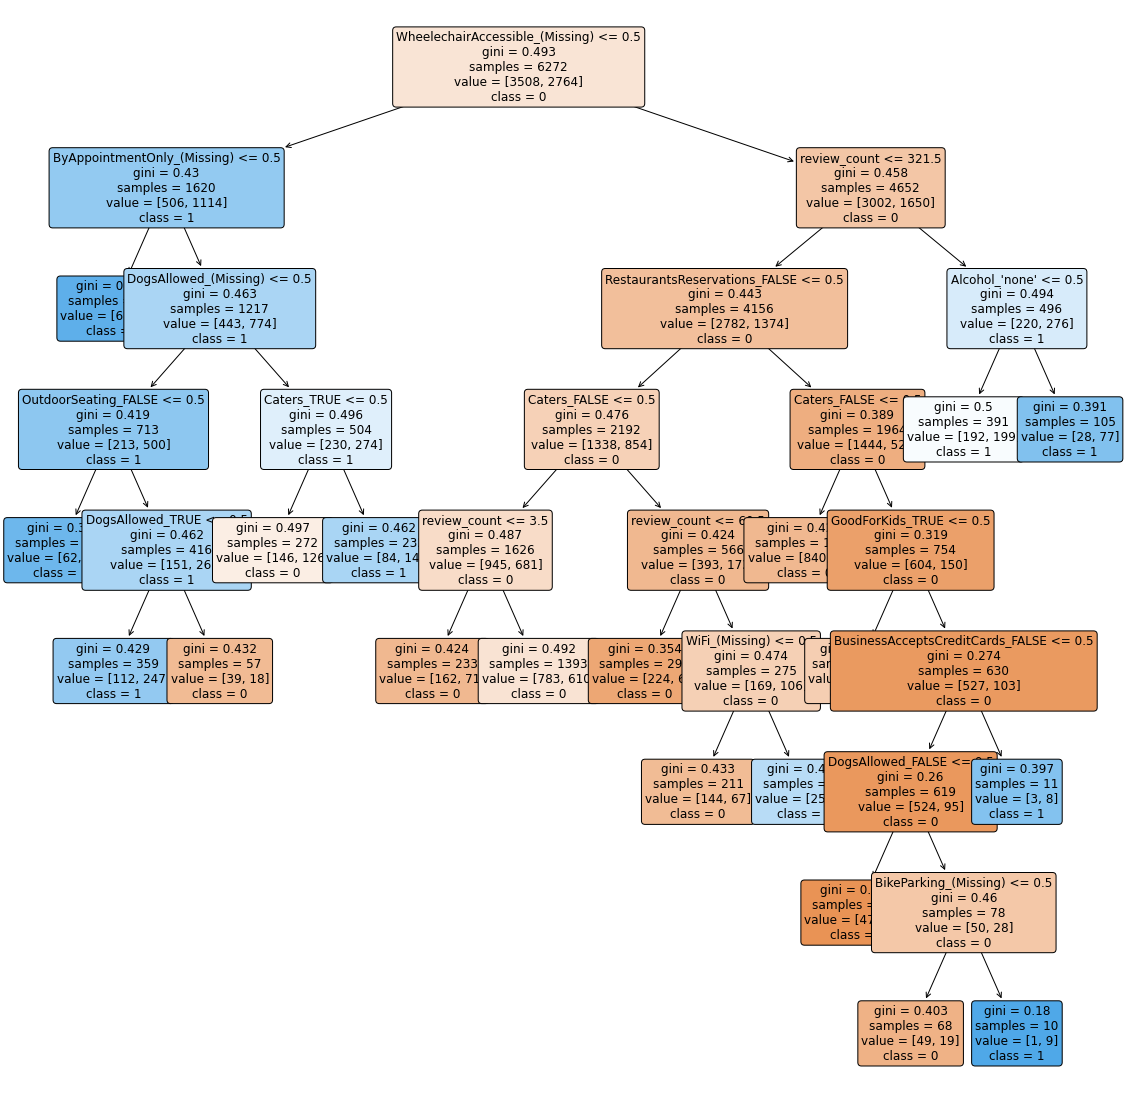

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(20,20))
plot_tree(dtc, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

Node count = 7


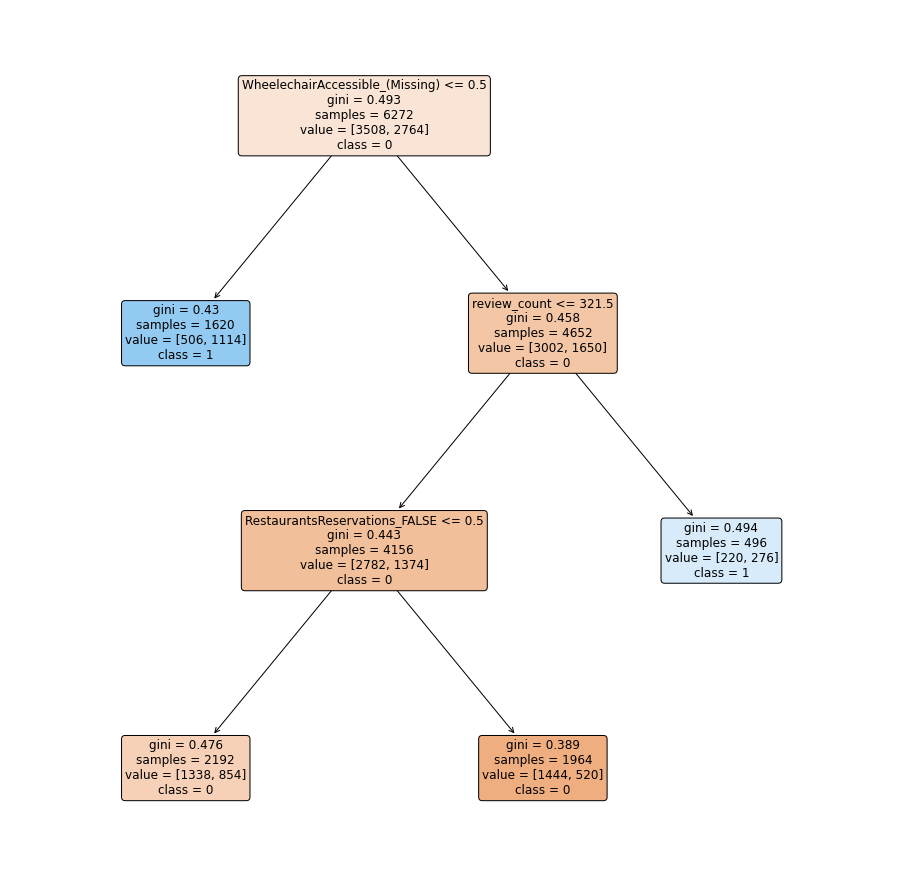

In [35]:
dtc2 = DecisionTreeClassifier(min_samples_leaf=5, 
                              ccp_alpha=0.005,
                              random_state = 88)

dtc2 = dtc2.fit(X_train_new, y_train_new)

print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize=(16,16))
plot_tree(dtc2, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12)  
plt.show() 

In [25]:
# MAKE PREDICTIONS 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Recall is also called sensitiviy or TPR := tp / (tp + fn)
#Precision := tp / (tp + fp)

y_pred = dtc2.predict(X_test_new)
cm = confusion_matrix(y_test_new, y_pred)

print ("Confusion Matrix : \n", cm)
print('Precision:',precision_score(y_test_new, y_pred))
print('TPR:',recall_score(y_test_new, y_pred))

Confusion Matrix : 
 [[1203  295]
 [ 617  573]]
Precision: 0.6601382488479263
TPR: 0.4815126050420168


# Linear Regression - Classifier

In [26]:
y_train0 = yelp_train['stars']
X_train0 = yelp_train.drop(['stars'], axis=1)
y_test0 = yelp_test['stars']
X_test0 = yelp_test.drop(['stars'], axis=1)

In [27]:
#change our linear regression into a classification
from sklearn.metrics import confusion_matrix

y_train_linear = yelp_train_class['stars']
y1 = model_new.predict(X_train0)
y_pred1 = pd.Series(['fourorabove' if x >=4 else 'below4' for x in y1], index=y1.index)

cm1 = confusion_matrix(y_train_linear, y_pred1)
print ("Confusion Matrix new : \n", cm1) 

accuracy_new = (cm1[0][0]+cm1[1][1])/np.sum(cm1)
print(accuracy_new)
FPRnew = cm1[0][1]/(cm1[0][0]+cm1[0][1])
TPRnew = cm1[1][1]/(cm1[1][0]+cm1[1][1])
print(FPRnew)
print(TPRnew)

Confusion Matrix new : 
 [[3372  136]
 [2201  563]]
0.6273915816326531
0.03876852907639681
0.2036903039073806


In [28]:
from sklearn.metrics import confusion_matrix

y_test_linear = yelp_test_class['stars']
y1 = model_new.predict(X_test0)
y_pred1 = pd.Series(['fourorabove' if x >=4 else 'below4' for x in y1], index=y1.index)

cm3 = confusion_matrix(y_test_linear, y_pred1)
print ("Confusion Matrix new : \n", cm3) 

accuracy_new3 = (cm3[0][0]+cm3[1][1])/np.sum(cm3)
print(accuracy_new3)
FPR3 = cm3[0][1]/(cm3[0][0]+cm3[0][1])
TPR3 = cm3[1][1]/(cm3[1][0]+cm3[1][1])
print(FPR3)
print(TPR3)

Confusion Matrix new : 
 [[1436   62]
 [ 981  209]]
0.6119791666666666
0.04138851802403204
0.17563025210084032


# Regression Tree - Classifier

In [29]:
#change our regression tree into a classification
y_train_tree = yelp_train_new['stars_fourorabove']
y2 = dtr_mod.predict(X_train)
y2 = [int(i>=4) for i in y2]
cm2 = confusion_matrix(y_train_tree, y2)
print ("Confusion Matrix new : \n", cm2) 

accuracy_new2 = (cm2[0][0]+cm2[1][1])/np.sum(cm2)
print(accuracy_new2)
FPR2 = cm2[0][1]/(cm2[0][0]+cm2[0][1])
TPR2 = cm2[1][1]/(cm2[1][0]+cm2[1][1])
print(FPR2)
print(TPR2)

Confusion Matrix new : 
 [[3382  126]
 [2187  577]]
0.631218112244898
0.03591790193842646
0.20875542691751087


In [30]:
from sklearn.metrics import confusion_matrix

y_test_tree = yelp_test_new['stars_fourorabove']
y4 = dtr_mod.best_estimator_.predict(X_test)
y4 = [int(i>=4) for i in y4]

cm4 = confusion_matrix(y_test_tree, y4)
print ("Confusion Matrix new : \n", cm4) 

accuracy_new4 = (cm4[0][0]+cm4[1][1])/np.sum(cm4)
print(accuracy_new4)
FPR4 = cm4[0][1]/(cm4[0][0]+cm4[0][1])
TPR4 = cm4[1][1]/(cm4[1][0]+cm4[1][1])
print(FPR4)
print(TPR4)

Confusion Matrix new : 
 [[1439   59]
 [ 975  215]]
0.6153273809523809
0.03938584779706275
0.18067226890756302


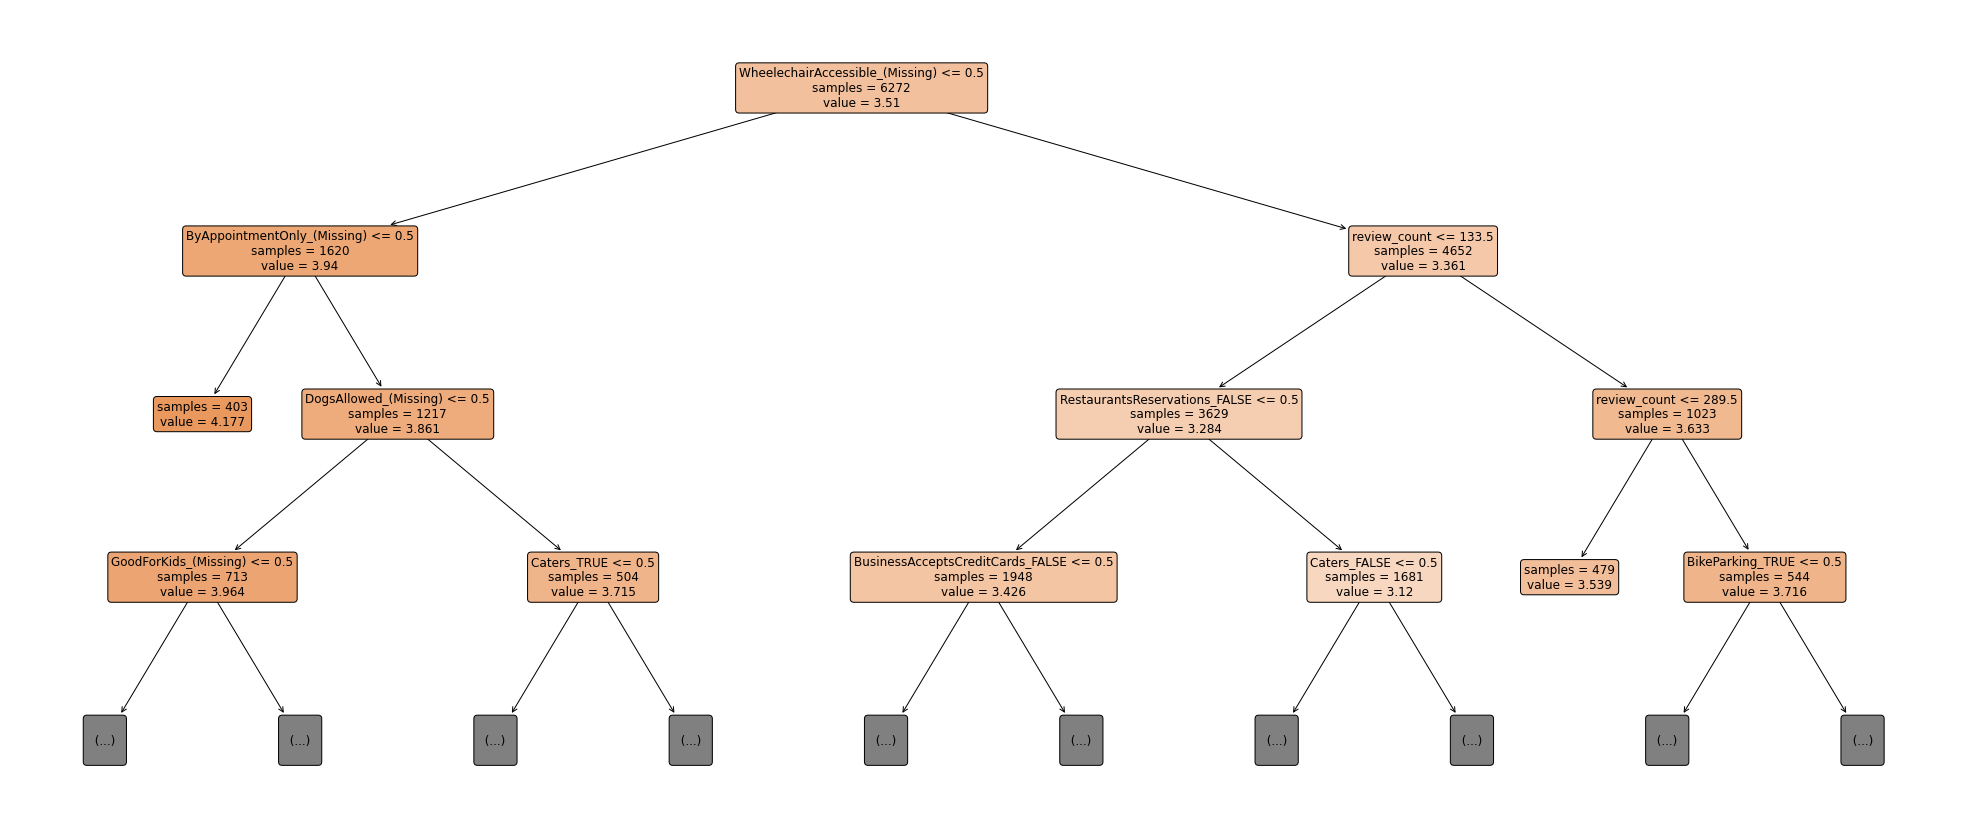

In [38]:
plt.figure(figsize=(35,15))
plot_tree(dtr_mod.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

# logistic regression classifier

In [31]:
#build logistic regression classifier
import statsmodels.formula.api as smf
logreg = smf.logit(formula = 'stars_fourorabove ~ review_count + C(GoodForKids,Treatment(reference = "(Missing)")) + C(Alcohol,Treatment(reference = "(Missing)")) + C(BusinessAcceptsCreditCards,Treatment(reference = "(Missing)")) + C(WiFi,Treatment(reference = "(Missing)")) + C(BikeParking,Treatment(reference = "(Missing)")) +C(ByAppointmentOnly,Treatment(reference = "(Missing)")) + C(WheelechairAccessible,Treatment(reference = "(Missing)")) + C(OutdoorSeating,Treatment(reference = "(Missing)")) + C(RestaurantsReservations,Treatment(reference = "(Missing)")) +C(DogsAllowed,Treatment(reference = "(Missing)")) +C(Caters,Treatment(reference = "(Missing)"))',
                   data = yelp_train_new).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.604809
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      stars_fourorabove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.1185
Time:                        00:45:57   Log-Likelihood:                -3793.4
converged:                       True   LL-Null:                       -4303.2
Covariance Type:            nonrobust   LLR p-value:                3.921e-199
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

In [32]:
from sklearn.metrics import confusion_matrix

y_test_log = yelp_test_new['stars_fourorabove']
y5 = logreg.predict(X_test0)
y_pred5 = pd.Series([1 if x > 0.5 else 0 for x in y5], index=y5.index)

cm5 = confusion_matrix(y_test_log, y_pred5)
print ("Confusion Matrix 5 : \n", cm5) 

accuracy_new5 = (cm5[0][0]+cm5[1][1])/np.sum(cm5)
print(accuracy_new5)
FPR5 = cm5[0][1]/(cm5[0][0]+cm5[0][1])
TPR5 = cm5[1][1]/(cm5[1][0]+cm5[1][1])
print(FPR5)
print(TPR5)

Confusion Matrix 5 : 
 [[1225  273]
 [ 623  567]]
0.6666666666666666
0.1822429906542056
0.4764705882352941


# Model Comparison 

In [33]:
print("Linear Regression model performance:")
print(accuracy_new3)
print(FPR3)
print(TPR3)


print("Regression tree model performance:")
print(accuracy_new4)
print(FPR4)
print(TPR4)

print("logistic regression model performance:")
print(accuracy_new5)
print(FPR5)
print(TPR5)

print("baseline model performance:")
print(baseline_test_accuracy)
print(FPR)
print(TPR)

Linear Regression model performance:
0.6119791666666666
0.04138851802403204
0.17563025210084032
Regression tree model performance:
0.6153273809523809
0.03938584779706275
0.18067226890756302
logistic regression model performance:
0.6666666666666666
0.1822429906542056
0.4764705882352941
baseline model performance:
0.5572916666666666
0.0
0.0
